In [73]:
import matplotlib.pyplot as plt
import numpy as npasd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import california_housing

(inputs, targets), (x_test, y_test) = california_housing.load_data(version='small', test_split=0.2)
print(inputs.shape, targets.shape)
print(x_test.shape, y_test.shape)

(480, 8) (480,)
(120, 8) (120,)


In [74]:
# Extract sets for training and validation
x_train = inputs[:380]
y_train = targets[:380]
x_val = inputs[380:]
y_val = targets[380:]

In [75]:
mean = x_train.mean(axis=0) # mean and standard deviation computed from training set only
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
x_val -= mean
x_val /= std
y_train /= 1e5
y_test /= 1e5
y_val /= 1e5

## Alkuperäinen malli
Tehtävään on jätetty alkuperäinen malli, joka tarjottiin tehtävä pohjassa, jotta tuloksia voi helpommin verrata johonkin.

In [242]:
# define the model architecture
model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# configure the learning algorithm
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_data=(x_val, y_val), verbose=0)

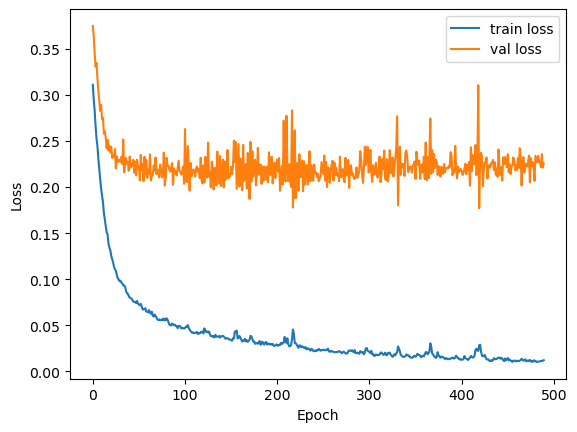

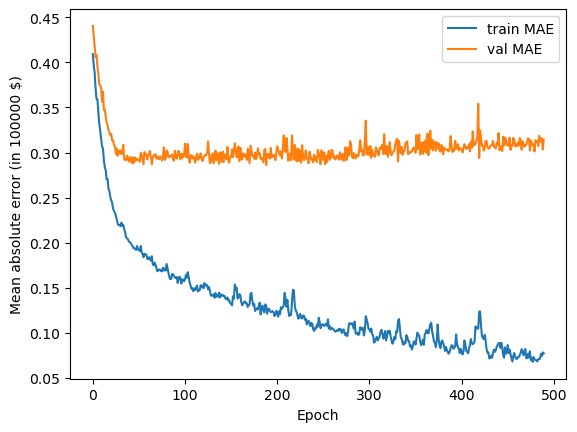

In [244]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')
plt.show()

## Alkuperäisen mallin MAE

In [248]:
x_train_full = np.concatenate((x_train, x_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

model = Sequential([
    Input(shape=(8,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.fit(x_train_full, y_train_full, epochs=100, batch_size=32, verbose=0)

test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test mean average error: {test_mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3272 - mae: 0.3266 
Test mean average error: 0.3190


# Ensimmäinen malli (0.2967 MAE)
Ensimmäisen tason kokoa on muutettu `64`:stä neuronista `256`:een neuroniin. Tasoihin lisättiin myös l2 regulaattori, jonka arvoksi asetettiin `0.01`.
Mallin koulutukseen lisättiin `EarlyStopping` callback argumentti, joka mahdollistaa koulutuksen lopetuksen, kuin arvot lakkaavat parantumasta.

In [78]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(8,)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(x_train, y_train, epochs=1000, batch_size=64, validation_data=(x_val, y_val), verbose=0, callbacks=[early_stopping])

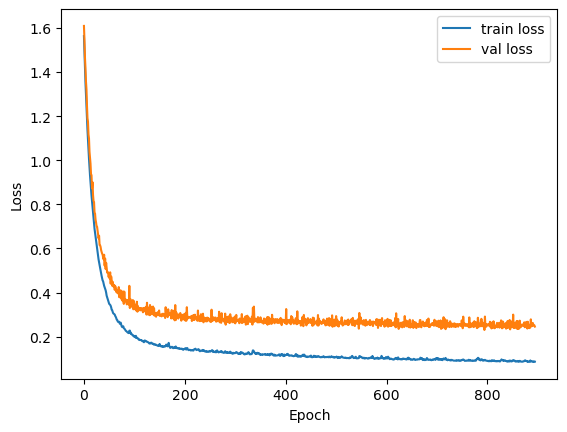

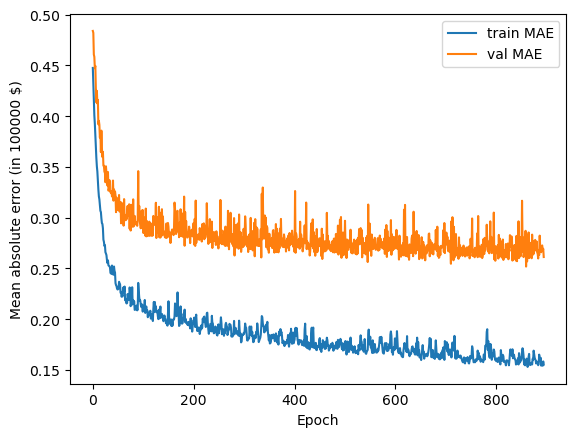

In [79]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')
plt.show()

## Ensimmäisen mallin tulokset

In [77]:
x_train_full = np.concatenate((x_train, x_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

model = Sequential([
    Input(shape=(8,)),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(x_train_full, y_train_full, epochs=1000, batch_size=64, verbose=0)

test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test mean average error: {test_mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3209 - mae: 0.2966
Test mean average error: 0.2967


# Toinen malli (0.2861 MAE)
Ensimmäisen tason neuroni määrää on nostettu `400`:aan neuroniin. `batch_size` argumenttia on myös nostettu `128`.

In [80]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(8,)),
    Dense(400, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(x_train, y_train, epochs=2000, batch_size=128, validation_data=(x_val, y_val), verbose=0, callbacks=[early_stopping])

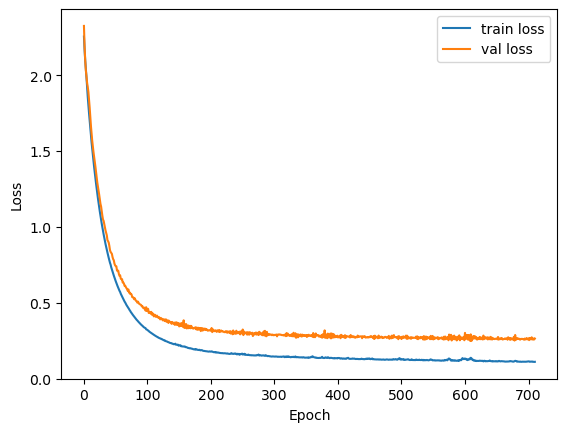

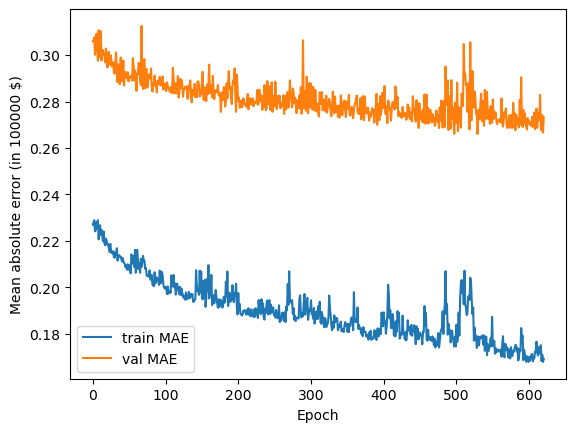

In [82]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['mae'][100:], label='train MAE')
plt.plot(history.history['val_mae'][100:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')
plt.show()

## Toisen mallin tulokset

In [83]:
x_train_full = np.concatenate((x_train, x_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)

model = Sequential([
    Input(shape=(8,)),
    Dense(400, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(x_train, y_train, epochs=700, batch_size=128, verbose=0)

test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test mean average error: {test_mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3426 - mae: 0.2870
Test mean average error: 0.2861


# Kolmas ja paras malli (0.2807 MAE)
Regulaattorin `l2` arvoa muutettiin `0.01`:stä arvoon `0.005`. Muita muutoksia on myös yritetty tehdä, mutta ne ei eivät tunnu parantavan mallia.

In [128]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(8,)),
    Dense(400, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(x_train, y_train, epochs=2000, batch_size=128, validation_data=(x_val, y_val), verbose=0, callbacks=[early_stopping])

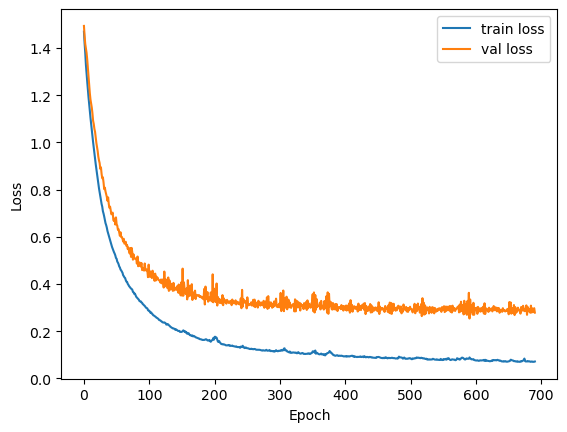

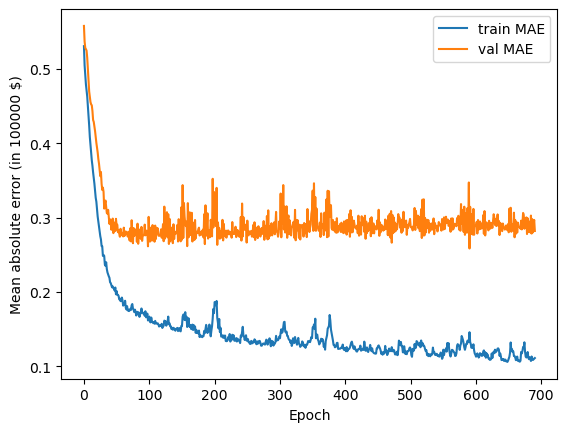

In [130]:
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')
plt.show()

## Kolmannen mallin tulokset

In [133]:
x_train_full = np.concatenate((x_train, x_val), axis=0)
y_train_full = np.concatenate((y_train, y_val), axis=0)


model = Sequential([
    Input(shape=(8,)),
    Dense(400, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.005)),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(x_train, y_train, epochs=700, batch_size=128, verbose=0)

test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test mean average error: {test_mae:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3283 - mae: 0.2899 
Test mean average error: 0.2807
